# Used to test Mango features and core functionalities

In [1]:
from mango.tuner import Tuner

In [2]:
param_dict = {
        'x': range(-10, 10),
        'y': range(-10, 10),
    }

In [3]:
def objfunc(args_list):
        results = []
        for hyper_par in args_list:
            x = hyper_par['x']
            y = hyper_par['y']
            result = -(x**2 + y**2)
            results.append(result)
        return results

In [4]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = 20

In [5]:
tuner = Tuner(param_dict, objfunc,conf_Dict)

In [6]:
print(tuner.getConf())

{'param_dict': {'x': range(-10, 10), 'y': range(-10, 10)}, 'userObjective': <function objfunc at 0x1a1958c620>, 'domain_size': 5000, 'initial_random': 1, 'num_iteration': 20, 'objective': 'maximize', 'batch_size': 1}


In [7]:
results = tuner.maximize()

In [8]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': 2, 'y': 2}
best objective: -8


# Other functions

In [9]:
ds = tuner.ds
domain_list = ds.get_domain()
X_domain_np = ds.convert_GP_space(domain_list)

In [10]:
X_domain_np[:,0].shape

(400,)

In [11]:
pred_y,sigma = tuner.Optimizer.predict(X_domain_np)

In [12]:
from matplotlib import pyplot as plt

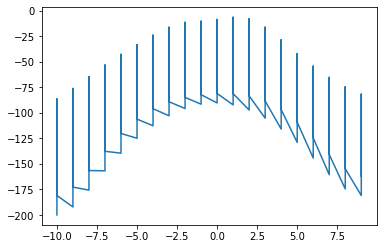

In [13]:
plt.plot(X_domain_np[:,0],pred_y,)

In [15]:
#pred_y